# Regression in Python



***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

# Part 1: Introduction to Linear Regression

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships
# SEE NOTE BELOW
### using alternate dataset recommended by sklearn

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [152]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

> The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

>The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

The results from the following code provide by sklearn does not match up with the rest of the notebook.
Neither the raw data nor the data frame contain the correct number of features (14 described in the data_url).
I will try to adapt this exercise to another dataset. I also think the recommendation from sklearn above is a good one to follow

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

In [153]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')

In [154]:
type(housing)

sklearn.utils._bunch.Bunch

In [155]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [156]:
housing.data.shape

(1460, 80)

In [157]:
# Print column names
print(housing.feature_names)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [158]:
# Print description of Boston housing data set
print(housing.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

Now let's explore the data set itself. 

In [159]:
bos = pd.DataFrame(housing.data)
bos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [160]:
bos.drop(columns='Id',inplace=True)

~~There are no column names in the DataFrame. Let's add those.~~

Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict ~~Boston~~Ames Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [161]:
print(housing.target.shape)

(1460,)


In [162]:
bos['PRICE'] = housing.target
bos.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PRICE
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [163]:
bos.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
PRICE              int64
Length: 80, dtype: object

## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [164]:
bos.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,PRICE
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 
 - ~~'CRIM' (per capita crime rate)~~
 - ~~'RM' (number of rooms)~~
 - ~~'PTRATIO' (pupil-to-teacher ratio in schools)~~  
 - 'LotFrontage' Linear feet of street connected to property
 - 'LotArea' Lot size in square feet
 - 'TotRmsAbvGrd' Total rooms above grade (does not include bathrooms)
 - 'YearRemodAdd' Remodel date (same as construction date if no remodeling or additions)

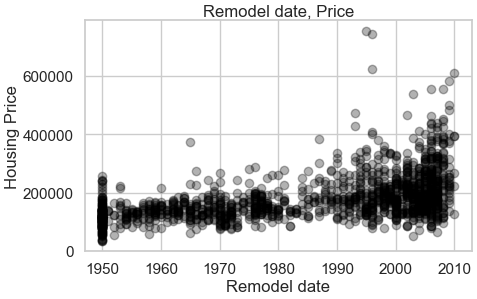

In [165]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.YearRemodAdd, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("Remodel date")
plt.ylabel("Housing Price")
plt.title("Remodel date, Price")
plt.show()

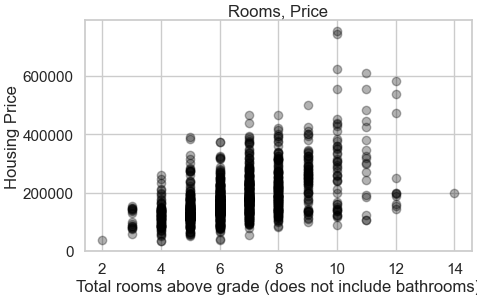

In [166]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.TotRmsAbvGrd, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("Total rooms above grade (does not include bathrooms)")
plt.ylabel("Housing Price")
plt.title("Rooms, Price")
plt.show()

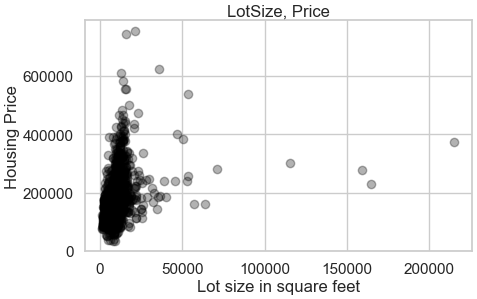

In [167]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.LotArea, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("Lot size in square feet")
plt.ylabel("Housing Price")
plt.title("LotSize, Price")
plt.show()

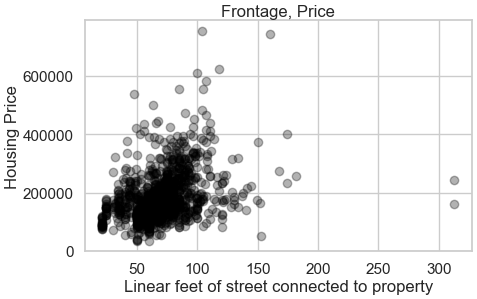

In [168]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.LotFrontage, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Housing Price")
plt.title("Frontage, Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

**Relationships** *note changed features*

 - Remodel Date: very slight positive trend with price, but not a real linear relationship. variance in housing price increases with more recent years.
 - Rooms: weak positive trend with price, harder to evaluate as it is a discrete variable.
 - Lot Size: positive relationship with price. linear relationship could be appropriate for the lower range of lot sizes
 - Frontage: positive relationship with price, but lots of variation.


**Scatter Plots for first features above, and more below**

**Other Variables of Interest**
 - already did one extra one above
 - OverallQual: Rates the overall material and finish of the house
 - OverallCond: Rates the overall condition of the house
 - MasVnrArea: Masonry veneer area in square feet
 - 1stFlrSF: First Floor square feet
 - PoolArea: Pool area in square feet
 - Fireplaces: Number of fireplaces

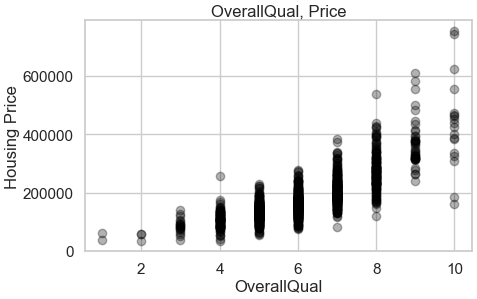

In [169]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.OverallQual, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("OverallQual")
plt.ylabel("Housing Price")
plt.title("OverallQual, Price")
plt.show()

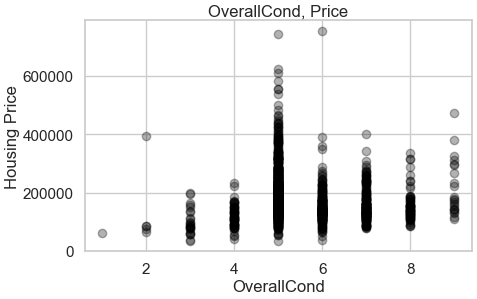

In [170]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.OverallCond, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("OverallCond")
plt.ylabel("Housing Price")
plt.title("OverallCond, Price")
plt.show()

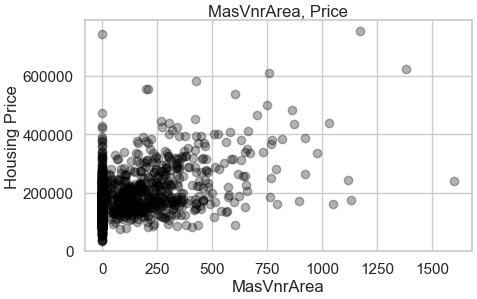

In [171]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.MasVnrArea, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("MasVnrArea")
plt.ylabel("Housing Price")
plt.title("MasVnrArea, Price")
plt.show()

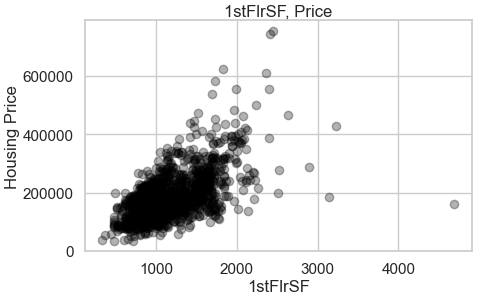

In [172]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos['1stFlrSF'], bos.PRICE, alpha=0.3, c='k')
plt.xlabel("1stFlrSF")
plt.ylabel("Housing Price")
plt.title("1stFlrSF, Price")
plt.show()

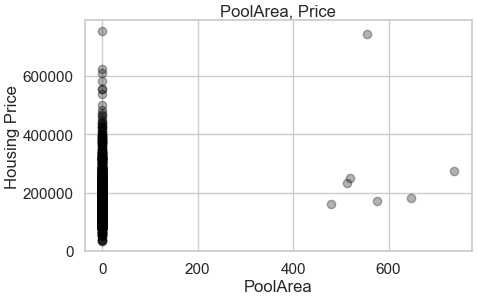

In [173]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.PoolArea, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("PoolArea")
plt.ylabel("Housing Price")
plt.title("PoolArea, Price")
plt.show()

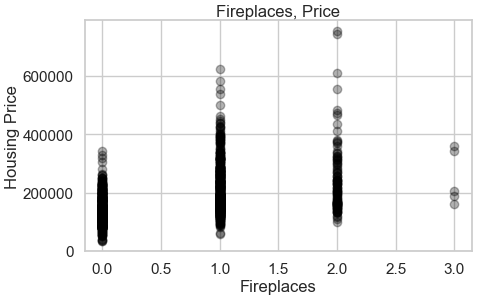

In [174]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.Fireplaces, bos.PRICE, alpha=0.3, c='k')
plt.xlabel("Fireplaces")
plt.ylabel("Housing Price")
plt.title("Fireplaces, Price")
plt.show()

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

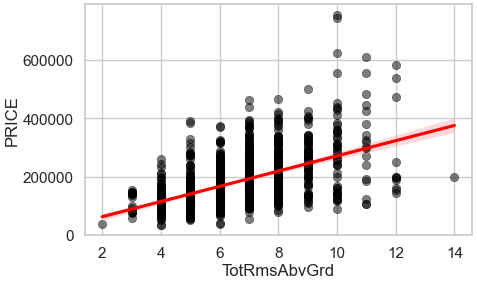

In [175]:
plt.figure(figsize=(10,6), dpi=50)
sns.regplot(y="PRICE", x="TotRmsAbvGrd", data=bos, fit_reg = True,
           line_kws=dict(color='r'), scatter_kws=dict(color='k',alpha=0.5))
plt.show()

### Histograms
***


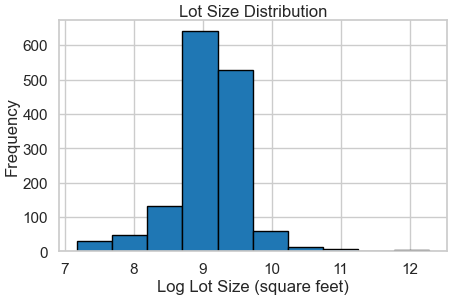

In [176]:
plt.figure(figsize=(10,6), dpi=50)
plt.hist(np.log(bos['LotArea']), edgecolor='k')
plt.title("Lot Size Distribution")
plt.xlabel("Log Lot Size (square feet)")
plt.ylabel("Frequency")
#plt.yscale('log')
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

Lot size used instead of crime rate, but there is still utility to evaluating the data with a log scale. See raw scale below.

Most houses fall within one bucket of log size, so the other houses (smaller or bigger log sizes) were not apparent. 
The transformation gives the lot size distribution more of a "normal" appearance.


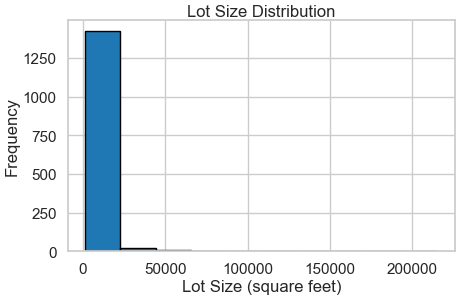

In [177]:
plt.figure(figsize=(10,6), dpi=50)
plt.hist(bos['LotArea'], edgecolor='k')
plt.title("Lot Size Distribution")
plt.xlabel("Lot Size (square feet)")
plt.ylabel("Frequency")
#plt.yscale('log')
plt.show()

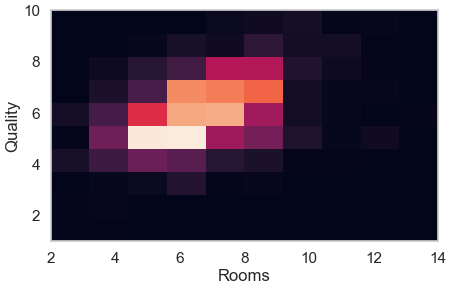

In [178]:
# plot next two features against each other
plt.figure(figsize=(10,6), dpi=50)
plt.hist2d(bos.TotRmsAbvGrd, bos.OverallQual)
plt.xlabel('Rooms')
plt.ylabel('Quality')
plt.show()

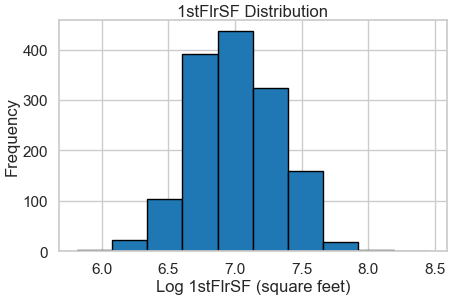

In [179]:
# More Histograms
plt.figure(figsize=(10,6), dpi=50)
plt.hist(np.log(bos['1stFlrSF']), edgecolor='k')
plt.title("1stFlrSF Distribution")
plt.xlabel("Log 1stFlrSF (square feet)")
plt.ylabel("Frequency")

plt.show()


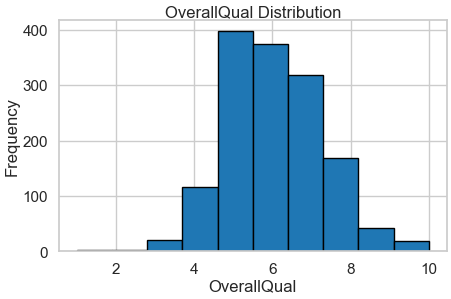

In [180]:
plt.figure(figsize=(10,6), dpi=50)
plt.hist(bos['OverallQual'], edgecolor='k')
plt.title("OverallQual Distribution")
plt.xlabel("OverallQual")
plt.ylabel("Frequency")

plt.show()


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [181]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [182]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ TotRmsAbvGrd',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     580.8
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.77e-108
Time:                        12:12:23   Log-Likelihood:                -18299.
No. Observations:                1460   AIC:                         3.660e+04
Df Residuals:                    1458   BIC:                         3.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.09e+04   7271.180      1.499   

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

The plot does not have symmetrical axes' bounds. The actual prices have a much larger range than the predicted prices.
The model predictions show a lot of error, and more at the higher ends of pricing.

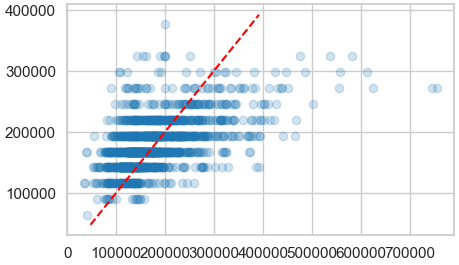

In [183]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.PRICE,m.fittedvalues, alpha=0.2)
xb = plt.ylim()
plt.plot(xb,xb,'r--')
plt.show()

### Fitting Linear Regression using `sklearn`


In [184]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1).select_dtypes(include='number')
X.dropna(inplace=True)
y = bos.loc[X.index,'PRICE']

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [162]:
# Look inside lm object
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [185]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, y)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


I believe the formulat notation, `Outcome ~ X1 + ...`, could be altered to force the model through the origin.
The [documentation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) also indicates the **hasconst** parameter can be set to `False`.

For this situation, I think it makes sense to have an intercept. 
In effect, this might be a "base" price of a home, and allow parameters to have a logical, negative effect.

It is not enough for the residuals to be normally distributed, they must also be symmetrical. 
They could be normally distributed, but with a *lean* in either the positive or negative direction and not be i.i.d.

False. It is more important for `Y` to have a linear relationship with a feature or combination of features.

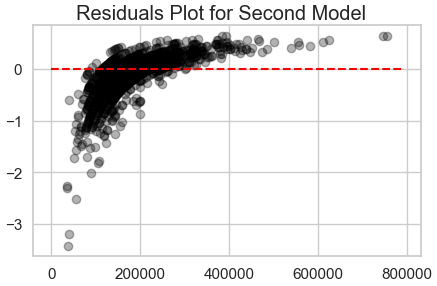

In [188]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.PRICE, (bos.PRICE-m.fittedvalues)/bos.PRICE, alpha=0.3, color='k')
xb = plt.xlim()
plt.plot(xb,[0,0],'r--')
plt.suptitle('Residuals Plot for Second Model', y=0.95)
plt.show()

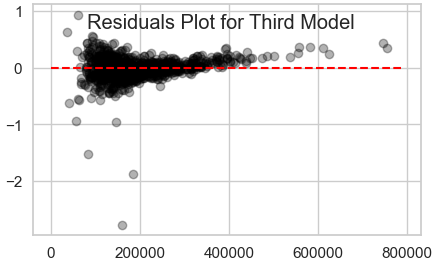

In [189]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(y, (y-lm.predict(X))/y, alpha=0.3, color='k')
xb = plt.xlim()
plt.plot(xb,[0,0],'r--')
plt.suptitle('Residuals Plot for Third Model', y=0.85)
plt.show()

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [190]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -323175.5897763159


In [191]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 36


In [192]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]\
            .sort_values('estimatedCoefficients', ascending=False).T

,3,25,16,22,18,4,23,17,5,6,...,33,24,32,1,0,34,35,19,20,21
features,OverallQual,GarageCars,BsmtFullBath,TotRmsAbvGrd,FullBath,OverallCond,Fireplaces,BsmtHalfBath,YearBuilt,YearRemodAdd,...,MiscVal,GarageYrBlt,PoolArea,LotFrontage,MSSubClass,MoSold,YrSold,HalfBath,BedroomAbvGr,KitchenAbvGr
estimatedCoefficients,18696.50401,16788.400095,8979.992041,5439.780659,5389.637271,5227.206864,4374.814692,2490.119357,316.968384,120.574167,...,-3.850122,-49.143148,-61.261751,-116.123245,-200.488965,-224.020866,-253.638426,-1118.523357,-10232.500714,-21931.278827


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [193]:
# first five predicted prices
lm.predict(X)[0:5]

array([231985.34832812, 197066.65449097, 224888.05724306, 201614.68619251,
       298801.23347425])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

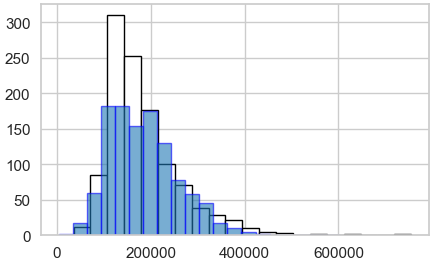

In [197]:
# your turn
plt.figure(figsize=(10,6), dpi=50)
plt.hist(y, bins=20, edgecolor='k',color='w')
plt.hist(lm.predict(X), bins=20, alpha=0.6, edgecolor='b')
plt.show()

The histogram shows an approximately normal distribution, with a tail at higher prices. These do not represent outliers.

I added the actual housing price distribution (black) behind the predicted prices (blue) to further analyze the predicted values.
The center of each distribution is at a similar price, but the actual prices have many more houses at the center.

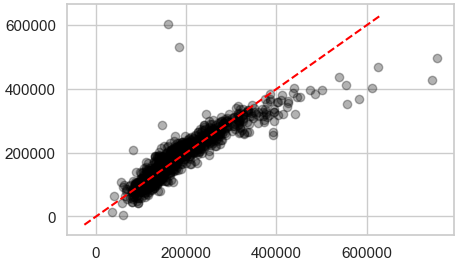

In [198]:
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(y, lm.predict(X), alpha=0.3, color='k')
xb = plt.ylim()
plt.plot(xb,xb,'r--')
plt.show()

Not bad predictions, but still under predicting the highest priced houses. This could indicate a high-end feature not available in the data. 
A residuals plot was provided above.

It seems like **sklearn** facilitates "larger" scale application of its models, with the ability to iterate models and integrate
them into pipelines built-in and ready. On the contrary, **statsmodels**, seems to have a more of a "math" lean, in that it provides more functionality for evaluating a model as if it was a single experiment.

Statsmodels will be nice for initial exploration of models, as it will help me understand the statistics and methods behind the models. The ease of iteration with sklearn might encourage blind iteration.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [199]:
print(np.sum((y - lm.predict(X)) ** 2))

1469655140896.963


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [200]:
print(np.sum((lm.predict(X) - np.mean(y)) ** 2))

6245868502005.694


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

Model fit below, as noted `1stFlrSF` was used instead of `PTRATIO`.

The R2 was `0.367`, it tells me about one-third of the variation in housing price was explained by first-floor area.

The F-statistic was `845.5`, it tells me that it's very likely this model fit was statistically significant and first-floor area has a true effect on pricing.

The t-statistic, `29.078`, seems to be the squareroot of the F-statistic.

In [202]:
print('F:', 845.5)
print('t:', 29.078)
print('t2:', 29.078**2)

F: 845.5
t: 29.078
t2: 845.530084


In [201]:
# subset data, will use 1stFlrSF instead of PTRATIO

model = sm.OLS(bos.PRICE, sm.add_constant(bos['1stFlrSF']))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          5.39e-147
Time:                        12:15:22   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e+04   5245.728      6.896      0.000    2.59e+04    4.65e+04
1stFlrSF     124.5006      4.282     29.078      0.000     116.102     132.899
==============================================================================
Omnibus:                      373.497   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.199
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                       9.317   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

Model fit below, parameter changes detailed in comment.

F-Statistic: `428.6`, the model's explanation of housing price is likely real.

R2: `0.469`, the three parameters explain about 47% of the variation in housing price.

Rooms, `TotRmsAbvGrd`, has the biggest influence on housing price of the three features, with a coefficient of `1.651e+04`.
First-floor area, `1stFlrSF `, is much less, but still has some effect. `LotArea` has a very low coefficient.

In [203]:
# using 1stFloorSF, TotRmsAbvGrd, LotArea
x = bos[['1stFlrSF','TotRmsAbvGrd','LotArea']]

In [204]:
x.isna().sum()

1stFlrSF        0
TotRmsAbvGrd    0
LotArea         0
dtype: int64

In [205]:
# subset data, will use 1stFlrSF instead of PTRATIO

model = sm.OLS(bos.PRICE, sm.add_constant(x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     428.6
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          1.64e-199
Time:                        12:15:39   Log-Likelihood:                -18082.
No. Observations:                1460   AIC:                         3.617e+04
Df Residuals:                    1456   BIC:                         3.619e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.92e+04   6669.481     -5.877      0.000   -5.23e+04   -2.61e+04
1stFlrSF        92.0359      4.440     20.729      0.000      83.327     100.745
TotRmsAbvGrd  1.651e+04   1026.231     16.091      0.000    1.45e+04    1.85e+04
LotArea          0.5215      0.160      3.263      0.001       0.208       0.835
==============================================================================
Omnibus:                      255.948   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3149.049
Skew:                           0.416   Prob(JB):                         0.00
Kurtosis:                      10.147   Cond. No.                     6.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
results.params

const          -39197.448107
1stFlrSF           92.035921
TotRmsAbvGrd    16513.372335
LotArea             0.521472
dtype: float64

In [21]:
pred = model.predict(results.params,sm.add_constant(x))

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>


| Model Section | Features | F-test | AIC |
|---------|-------|----------|----|
| Part 3 | `'1stFlrSF','TotRmsAbvGrd','LotArea'` | 428.6 | 3.617e+04 | 
| Part 4 | `'1stFlrSF','TotRmsAbvGrd','LotArea', 'GarageCars', 'OverallQual'` | 849.9 | 3.510e+04 | 

#### The second model is better. There is clear improvement in the F-statistic, and the AIC is lower.

---

In [157]:
x = bos[['1stFlrSF','TotRmsAbvGrd','LotArea', 'GarageCars', 'OverallQual']]
x.isna().sum()

1stFlrSF        0
TotRmsAbvGrd    0
LotArea         0
GarageCars      0
OverallQual     0
dtype: int64

In [158]:

model = sm.OLS(bos.PRICE, sm.add_constant(x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     849.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:20:43   Log-Likelihood:                -17546.
No. Observations:                1460   AIC:                         3.510e+04
Df Residuals:                    1454   BIC:                         3.514e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.361e+05   5448.778    -24.980      0.000   -1.47e+05   -1.25e+05
1stFlrSF        39.1534      3.363     11.642      0.000      32.557      45.750
TotRmsAbvGrd  7422.5575    747.529      9.929      0.000    5956.207    8888.908
LotArea          0.7631      0.111      6.863      0.000       0.545       0.981
GarageCars    1.851e+04   1814.235     10.203      0.000     1.5e+04    2.21e+04
OverallQual    2.99e+04   1022.593     29.243      0.000    2.79e+04    3.19e+04
==============================================================================
Omnibus:                      502.463   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16196.981
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                      19.206   Cond. No.                     7.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [96]:
# Copying code to generate model for clarity
# OLS from 3 features: 

x = bos[['1stFlrSF','TotRmsAbvGrd','LotArea']]
model = sm.OLS(bos.PRICE, sm.add_constant(x))
results = model.fit()
# results.summary()
pred = model.predict(results.params,sm.add_constant(x))


In [99]:
results.resid[0:5] == (bos.PRICE- pred)[0:5]

0    True
1    True
2    True
3    True
4    True
dtype: bool

**Residuals Plot**

Two plots provided in cells below. One is raw residuals, and the other is standardized.

The plots show that the model predictions have a pattern to their error, violating model assumptions. 
The raw residuals plot clearly shows a trend of positive error for low PRICES, and negative error for high PRICES.
Both plots show that the variance in predictions seems to have a negative relationship with PRICE

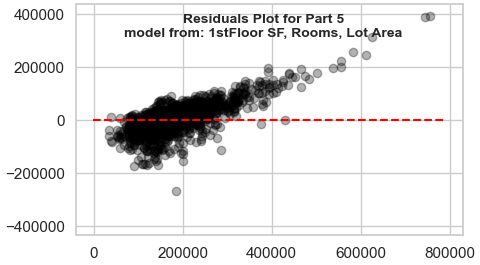

In [97]:
# fitted values vs Residuals
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.PRICE, results.resid, alpha=0.3, color='k')
xb = plt.xlim()
plt.plot(xb,[0,0],'r--')
yb = plt.ylim()
plt.ylim([-1*max(yb),max(yb)])
plt.suptitle('Residuals Plot for Part 5\nmodel from: 1stFloor SF, Rooms, Lot Area',
             y=0.85, fontsize='small', fontweight='bold')
plt.show()

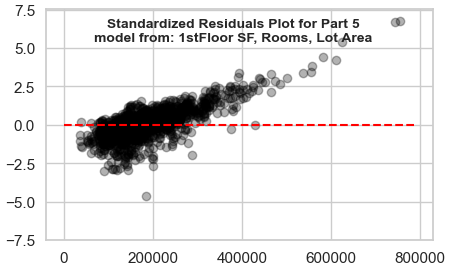

In [98]:
# fitted values vs Residuals
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(bos.PRICE, results.resid_pearson, alpha=0.3, color='k')
xb = plt.xlim()
plt.plot(xb,[0,0],'r--')
yb = plt.ylim()
plt.ylim([-1*max(yb),max(yb)])
plt.suptitle('Standardized Residuals Plot for Part 5\nmodel from: 1stFloor SF, Rooms, Lot Area',
             y=0.85, fontsize='small', fontweight='bold')
plt.show()

**QQ Residuals Plot**

The plot tells me that the residuals do not follow a normal distribution very closely. There is deviance from the guideline.

<Figure size 500x300 with 0 Axes>

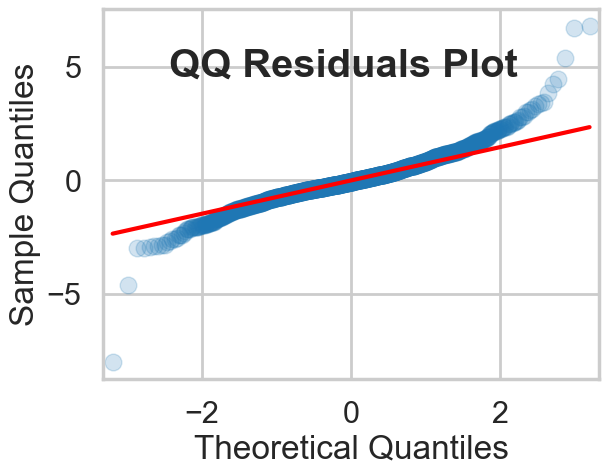

In [93]:
# Quantile plot for residuals
plt.figure(figsize=(10,6), dpi=50)
sm.qqplot((results.resid),alpha=0.2, fit=True, line='q')
plt.suptitle('QQ Residuals Plot',y=0.8, fontweight='bold')
plt.show()

**Compare Plots**

The residuals plots more clearly show the raw characteristics of the error. They provide a picture of its spread, magnitude, and direction across their range. However, interpreting their shape or distribution is not as clear on the residuals plot as it is on the QQ plot. The QQ plot is better for determining if the residuals follow a normal distribution.

**Outliers**

There is one prediction that stands out to me. A house with an actual price of just less than 200,000 has a predicted value of over 400,000! The standardized residuals plot indicates it's almost 3x the actual value. Similar mangitudes of error was apparent for the highest priced houses, as the model predictions tended to be much lower than actual price. But when standardized, this region's error was not as extreme.

**Leverage Plot**

Plot in cell below. The outlier mentioned in the previous answer, is even more obvious in the leverage plot. The features used in the model and price are shown for that point below. Its price is on the lower end of all prices, but its values for the other three features are on the extreme end of all the houses (refer to the histograms and scatter plots). For example, no house had more than 14 rooms, and a select few from the dataset had 12 or more. Accordingly, the model predicted that this house should be one of the highest prices.

Maybe this house is not in a desireable location with cheap land and lots of area. It could also be really old. Its possible that it hasn't been sold recently, and the price does not reflect its current value.

In [141]:
bos.loc[1298,['1stFlrSF','TotRmsAbvGrd','LotArea','PRICE']]

YearRemodAdd      2008
1stFlrSF          4692
TotRmsAbvGrd        12
LotArea          63887
PRICE           160000
Name: 1298, dtype: object

<Figure size 1000x1000 with 0 Axes>

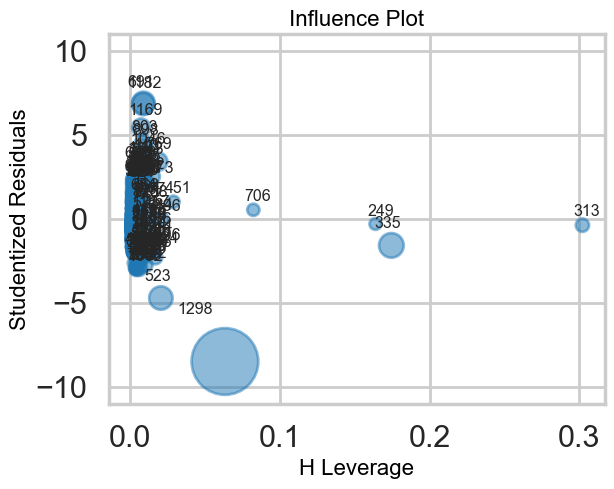

In [135]:
# leverage plot
rcParams['font.size'] = 8
plt.figure(figsize=(10,10))
sm.graphics.influence_plot(results, criterion='cooks', plot_alpha=0.5)
#plt.tight_layout()
plt.ylim(-11,11)
plt.show()

**Remove outliers and rerun Model**

First, I printed the summary of the model before any removal. Then I removed the single point discussed above and printed another summary, and reran all the plotting exercises. The summaries indicate a model improvement, with a slightly improved R2, F-statistic, and AIC score.

In [150]:
# model statistics before removal:
print('model before removing one outlier')
results.summary()

model before removing one outlier


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     428.6
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          1.64e-199
Time:                        11:57:11   Log-Likelihood:                -18082.
No. Observations:                1460   AIC:                         3.617e+04
Df Residuals:                    1456   BIC:                         3.619e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.92e+04   6669.481     -5.877      0.000   -5.23e+04   -2.61e+04
1stFlrSF        92.0359      4.440     20.729      0.000      83.327     100.745
TotRmsAbvGrd  1.651e+04   1026.231     16.091      0.000    1.45e+04    1.85e+04
LotArea          0.5215      0.160      3.263      0.001       0.208       0.835
==============================================================================
Omnibus:                      255.948   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3149.049
Skew:                           0.416   Prob(JB):                         0.00
Kurtosis:                      10.147   Cond. No.                     6.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
# Copying code to generate model for clarity
# OLS from 3 features: 

adj = bos.drop(index=1298) #remove outlier

x = adj[['1stFlrSF','TotRmsAbvGrd','LotArea']]
model2 = sm.OLS(adj.PRICE, sm.add_constant(x))
results2 = model2.fit()
print('model after removing one outlier')
results2.summary()


model after removing one outlier


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     473.3
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          1.45e-214
Time:                        11:57:20   Log-Likelihood:                -18035.
No. Observations:                1459   AIC:                         3.608e+04
Df Residuals:                    1455   BIC:                         3.610e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -4.77e+04   6589.786     -7.238      0.000   -6.06e+04   -3.48e+04
1stFlrSF        99.5300      4.425     22.492      0.000      90.850     108.210
TotRmsAbvGrd  1.637e+04   1002.295     16.335      0.000    1.44e+04    1.83e+04
LotArea          0.6208      0.156      3.967      0.000       0.314       0.928
==============================================================================
Omnibus:                      246.682   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1423.709
Skew:                           0.653   Prob(JB):                    7.01e-310
Kurtosis:                       7.660   Cond. No.                     6.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

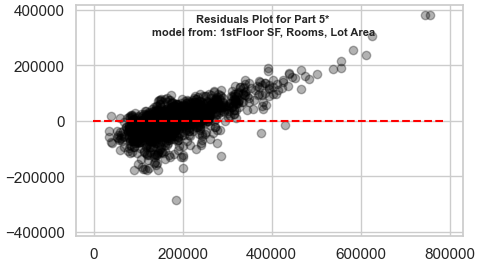

In [146]:
# fitted values vs Residuals
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(adj.PRICE, results2.resid, alpha=0.3, color='k')
xb = plt.xlim()
plt.plot(xb,[0,0],'r--')
yb = plt.ylim()
plt.ylim([-1*max(yb),max(yb)])
plt.suptitle('Residuals Plot for Part 5*\nmodel from: 1stFloor SF, Rooms, Lot Area',
             y=0.85, fontsize=16, fontweight='bold')
plt.show()

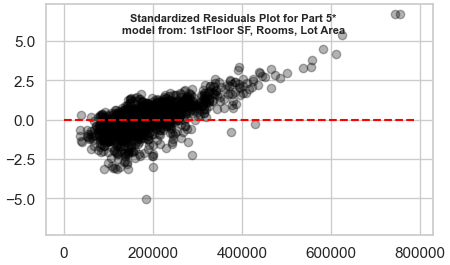

In [147]:
# fitted values vs Residuals
plt.figure(figsize=(10,6), dpi=50)
plt.scatter(adj.PRICE, results2.resid_pearson, alpha=0.3, color='k')
xb = plt.xlim()
plt.plot(xb,[0,0],'r--')
yb = plt.ylim()
plt.ylim([-1*max(yb),max(yb)])
plt.suptitle('Standardized Residuals Plot for Part 5*\nmodel from: 1stFloor SF, Rooms, Lot Area',
             y=0.85, fontsize=16, fontweight='bold')
plt.show()

<Figure size 500x300 with 0 Axes>

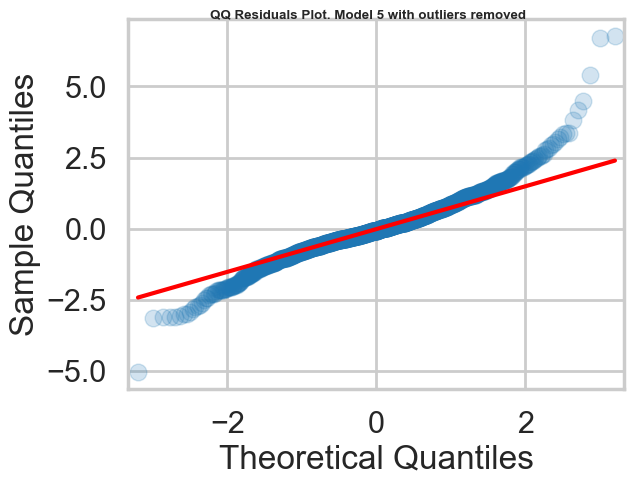

In [148]:
# Quantile plot for residuals
plt.figure(figsize=(10,6), dpi=50)
sm.qqplot((results2.resid),alpha=0.2, fit=True, line='q')
plt.suptitle('QQ Residuals Plot. Model 5 with outliers removed',y=0.9, fontweight='bold')
plt.show()

<Figure size 1000x1000 with 0 Axes>

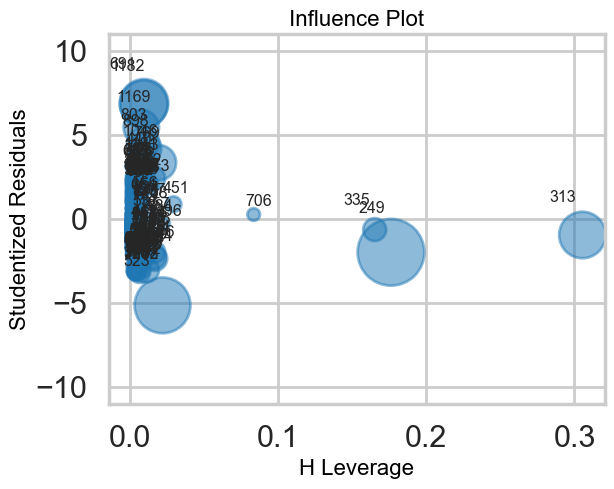

In [149]:
# leverage plot
rcParams['font.size'] = 8
plt.figure(figsize=(10,10))
sm.graphics.influence_plot(results2, criterion='cooks', plot_alpha=0.5)
#plt.tight_layout()
plt.ylim(-11,11)
plt.show()